In [68]:
import random
import networkx as nx
import csv
import matplotlib.pyplot as plt
from itertools import combinations, chain

with open('data.csv', 'r') as file:
    reader = csv.DictReader(file)
    l = list(reader)
authors_list = [e['Authors'].lstrip() for e in l]
nodes = []
edges = []
for authors in authors_list:
    authors = authors.split(' & ')
    if len(authors) == 1:
        nodes.append(authors[0])
    elif len(authors) == 2:
        edges.append(tuple(authors))
    elif len(authors) > 2:
        edges.extend(list(combinations(authors, 2)))
print("Nodos: {}, Aristas: {}".format(len(nodes), len(edges)))

graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

Nodos: 2513, Aristas: 13015


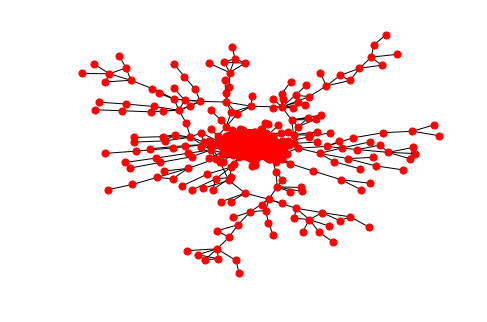

In [69]:
indices_elegidos = random.sample( [i for i in range(len(list(graph.nodes)))], 1000)
nodos_elegidos = [list(graph.nodes)[i] for i in indices_elegidos]
degrees = list(dict(graph.degree).values())[:500]
nx.draw_kamada_kawai(graph.subgraph(nodos_elegidos), node_size=50)
plt.show()

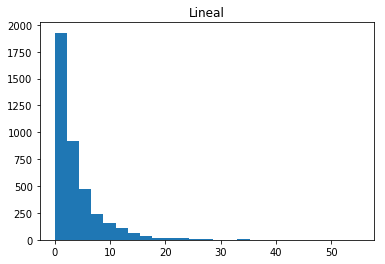

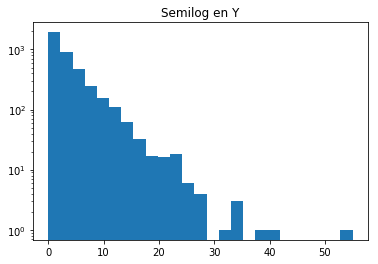

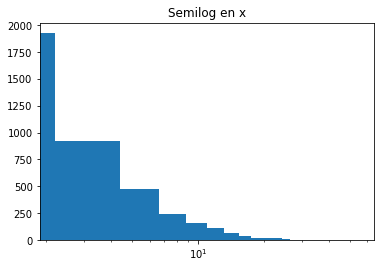

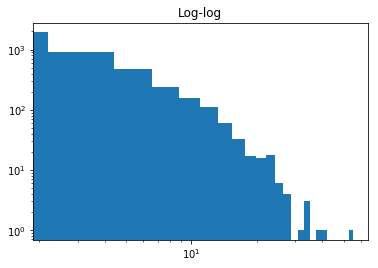

In [15]:
plt.hist(list(dict(graph.degree).values()), bins=25)
plt.title("Lineal")
plt.show()

plt.hist(list(dict(graph.degree).values()), bins=25)
plt.yscale('log')
plt.title("Semilog en Y")
plt.show()

plt.hist(list(dict(graph.degree).values()), bins=25)
plt.xscale('log')
plt.title("Semilog en x")
plt.show()

plt.hist(list(dict(graph.degree).values()), bins=25)
plt.yscale('log')
plt.xscale('log')
plt.title("Log-log")
plt.show()


## Distribución de grado
A partir de los gráficos, suponemos que la distribución de grado sigue la Ley de potencias. Esto se puede observar en el gráfico con escala logarítmica en el eje Y, donde se observa un decrecimiento lineal. Al tomar log-log, el gráfico se curva hacia abajo, indicando que la distribución no es exponencial

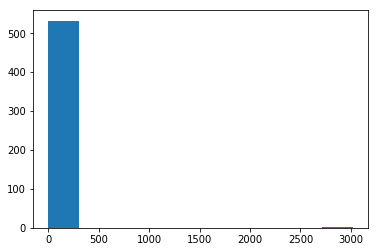

Longitud de componente conexa gigante: 3018


In [138]:
ccs = list(nx.algorithms.components.connected_components(graph))
plt.hist([len(cc) for cc in ccs])
plt.show()
print("Longitud de componente conexa gigante: {}".format(max([len(cc) for cc in ccs])))

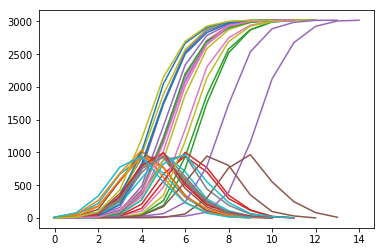

In [140]:
giant_cc_nodes = list(nx.algorithms.components.connected_components(graph))[1]
giant_cc = graph.subgraph(giant_cc_nodes)

def get_neighbors(node):
    return set(giant_cc[node])

def get_neighbors_of_nodes(nodes):
    res = set()
    for node in nodes:
        res |= get_neighbors(node)
    return set(res)

for _ in range(20):
    start = random.choice(list(giant_cc_nodes))
    neighbors = set([start])
    number_of_neighbors = [1]
    number_of_new_neighbors = []
    while len(neighbors) < len(giant_cc_nodes):
        neighbors |= get_neighbors_of_nodes(neighbors)
        number_of_neighbors.append(len(neighbors))
        n_new = number_of_neighbors[-1] - number_of_neighbors[-2]
        number_of_new_neighbors.append(n_new)
    plt.plot(number_of_neighbors)
    plt.plot(number_of_new_neighbors)
plt.show()

# Tamaños de Vecindades

### Gráficos

Para graficar, tomamos un conjunto de nodos iniciales, y graficamos la conectividad a medida que permitimos más grados de libertad, para cada uno de ellos. Para ello, en primer lugar, graficamos la cantidad de nuevos vecinos que agregamos a cada paso. Éstos gráficos son los que crecen y después decaen. Luego, graficamos la cantidad de nodos totales alcanzados al alejarnos dicha cantidad de pasos (es decir, la cantidad acumulada de nodos visitados).

Podemos ver que todos los nodos elegidos llegan a visitar a la componente entera en a lo sumo 12 pasos, lo que nos indica que la mayor distancia encontrada entre dos nodos de dicha componente es 12. Por otro lado, si bien algunos tardan más en expandir la red visitada, todos llegan a un paso en el que agregan alrededor de mil nodos nuevos. 

También podríamos clasificar a los nodos iniciales como "conectados" o "poco conectados", en función de la máxima distancia hacia el nodo más lejano. Esto parece estar relacionado con el momento en el que llega al pico de 1000. Tiene sentido que, si rápidamente agregué muchos nodos, el resto no esté muchos pasos más lejos. Por el contrario, si al principio agregué de a pocos (y el pico llega en el paso 6 o 7), voy a necesitar alejarme más para cubrir toda la componente.

### Seis grados de separación

Este concepto refiere a la idea de que cualesquiera dos personas en el mundo están conectadas a través de 6 relaciones encadenadas de media. En nuestro caso, estar relacionado significa ser coautor en un trabajo científico. Por un lado, al poder clasificar al contenido científico publicado por áreas, es posible que aparezcan varios clusters de autores del mismo ámbito/disciplina. 

En nuestro caso, observamos que haya nodos hasta 12 grados de distancia entre sí. Sin embargo, el promedio de separación entre dos nodos es de 6, con lo cual encajaría en la definición que considera la media.

# Clustering

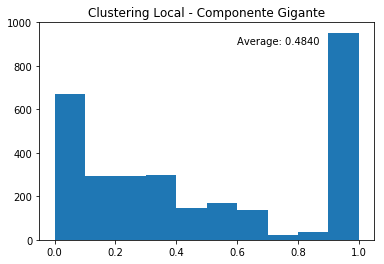

In [99]:
giant_cc_nodes = list(nx.algorithms.components.connected_components(graph))[1]
giant_cc = graph.subgraph(giant_cc_nodes)

av_clust = nx.average_clustering(giant_cc)
plt.hist(list(nx.clustering(giant_cc).values()))
plt.title('Clustering Local - Componente Gigante')
plt.text(0.6,900,'Average: %.4f'%av_clust)
plt.show()

In [143]:
giant_cc_nodes = list(nx.algorithms.components.connected_components(graph))[1]
giant_cc = graph.subgraph(giant_cc_nodes)

nx.average_shortest_path_length(giant_cc)

6.131037221593651

In [123]:
random_graph = nx.random_degree_sequence_graph(sorted(list(dict(giant_cc.degree).values())) )

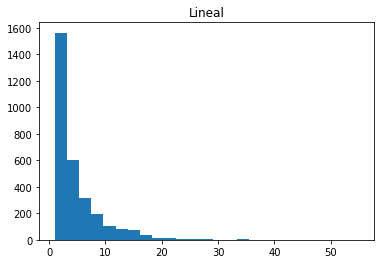

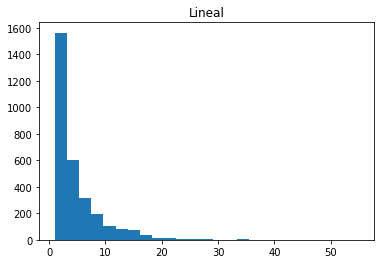

In [124]:
plt.hist(list(dict(giant_cc.degree).values()), bins=25)
plt.title("Lineal")
plt.show()

plt.hist(list(dict(random_graph.degree).values()), bins=25)
plt.title("Lineal")
plt.show()

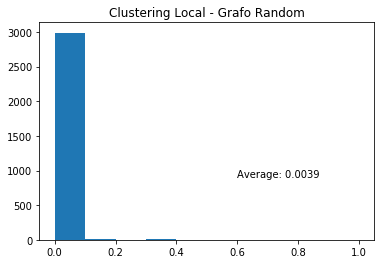

In [135]:
random_graph_gcc = max(nx.connected_component_subgraphs(random_graph), key=len)

av_clust = nx.average_clustering(random_graph_gcc)
plt.hist(list(nx.clustering(random_graph).values()))
plt.title('Clustering Local - Grafo Random')
plt.text(0.6,900,'Average: %.4f'%av_clust)
plt.show()

In [141]:
nx.average_shortest_path_length(random_graph_gcc)

4.7297025552477265

In [130]:
print(len(list(nx.algorithms.components.connected_components(random_graph))))
print(len(random_graph.nodes))

11
3018


Podemos observar, que en el grafo aleatorio, no se produjo un efecto de clustering en los nodos. Si bien la conectividad local de los nodos es la misma, la distribución de las aristas entre ellos no favoreció la aparición de clusters. Esto se condice con lo que esperamos ver en la realidad. Los autores publican con otros autores del mismo campo, grupo de investigación o ubicación geográfica, lo cual propicia la aparición de clusters. Si todos los autores publicaran trabajos con cualquiera de los otros (como sucede en el aleatorio), la clusterización será mucho menor.

Por otro lado, la distancia media entre nodos sufre un efecto opuesto: en el grafo original la distancia promedio es 6, mientras que en el aleatorio construido 4.7. Esto también tiene sentido, ya que a mayor clusterización, hacen falta más pasos para saltar de cluster a cluster (aunque visitar uno solo se realice rápidamente).

# Estrellas

Nos interesaría poder identificar a los autores "estrella". Para esto analizamos varias métricas. La primera y quizás más sencilla es el grado: según esta métrica, un autor sería más "estrella" cuanto mayor cantidad de co-autores distintos haya tenido en su carrera. Considerando el dominio del problema podría ser una métrica razonable: si tomamos de ejemplo a Paul Erdős, matemático que definitivamente se considera "estrella" en su campo, vemos que tiene [511 colaboradores](https://en.wikipedia.org/wiki/Paul_Erd%C5%91s), una cifra realmente significativa.

Hay, sin embargo, características que esta medida no atrapa. Un autor/nodo puede tener muchos colaboradores/vecinos que sean también vecinos entre sí (el fenómeno de clustering, ya analizado). Frente a esto, otra medida posible de "estrellato" es aquellos autores que conectan entre sí autores que no estarían conectados de otro modo, o sí pero con una distancia mucho mayor. Vista como medida de centralidad de grafo, puede verse como la cantidad de caminos mínimos entre dos nodos cualesquiera que pasan por dicho nodo (llamada _Betweenness_ en la literatura).

In [28]:
central_degree = sorted(nx.degree_centrality(graph).items(), key = lambda author: author[1], reverse=True)
central_betweenness = sorted(nx.betweenness_centrality(graph).items(), key = lambda author: author[1], reverse=True)

central_degree[:10], central_betweenness[:10]

([('Lee', 0.013774104683195591),
  ('Ambjorn', 0.010267968945654895),
  ('Kim', 0.00976709241172051),
  ('Park', 0.00876533934385174),
  ('Ferrara', 0.00876533934385174),
  ('Vafa', 0.008514901076884547),
  ('Strominger', 0.007763586275982969),
  ('Odintsov', 0.007012271475081391),
  ('Gibbons', 0.007012271475081391),
  ('Pope', 0.0067618332081141996)],
 [('Lee', 0.043223876642117694),
  ('Kim', 0.028639118518740986),
  ('Vafa', 0.027731776277165755),
  ('Ambjorn', 0.023272752774358856),
  ('Kogan', 0.020992027704311432),
  ('Gibbons', 0.019200180807687317),
  ('Li', 0.018839591249695056),
  ('Ohta', 0.018779910583731935),
  ('Ivanov', 0.018360529676892258),
  ('Johnson', 0.018318854489869068)])

Vemos que ambos criterios coinciden en 5 de los 10 autores "estrella" (aunque en distinto orden), lo cual da cuenta de cierta consistencia entre ambos. De hecho, ambos coinciden en el primer lugar.

Analizaremos ahora qué ocurriría si esos nodos desapareciecen.

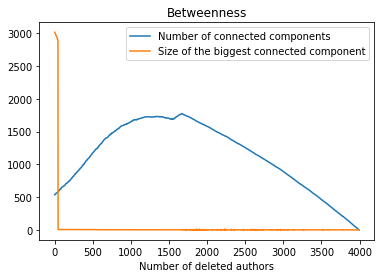

In [73]:
graph_without_central_nodes = graph.copy()

number_ccs = []
lenghts_of_giant = []
for author in [a[0] for a in central_betweenness]:
    graph_without_central_nodes.remove_node(author)
    
    ccs = list(nx.algorithms.components.connected_components(graph_without_central_nodes))
    n_ccs = len(ccs)
    number_ccs.append(n_ccs)
    n_giant = len(ccs[1] if n_ccs > 1 else [])
    lenghts_of_giant.append(n_giant)

plt.plot(number_ccs, label='Number of connected components')
plt.plot(lenghts_of_giant, label='Size of the biggest connected component')
plt.xlabel('Number of deleted authors')
plt.legend()
plt.title('Betweenness')
plt.show()

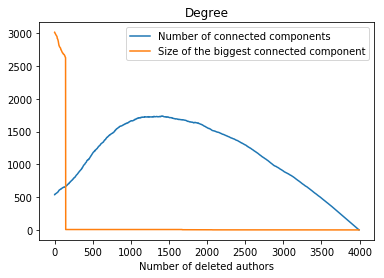

In [74]:
graph_without_central_nodes = graph.copy()

number_ccs = []
lenghts_of_giant = []
for author in [a[0] for a in central_degree]:
    graph_without_central_nodes.remove_node(author)
    
    ccs = list(nx.algorithms.components.connected_components(graph_without_central_nodes))
    n_ccs = len(ccs)
    number_ccs.append(n_ccs)
    n_giant = len(ccs[1] if n_ccs > 1 else [])
    lenghts_of_giant.append(n_giant)

plt.plot(number_ccs, label='Number of connected components')
plt.plot(lenghts_of_giant, label='Size of the biggest connected component')
plt.xlabel('Number of deleted authors')
plt.legend()
plt.title('Degree')
plt.show()

Podemos ver que, a medida que eliminamos nodos centrales, la cantidad de componentes conexas aumenta hasta un punto a partir del cual comenzamos a eliminar nodos aislados (lo cual reduce su número). El tamaño de la componente conexa más grande, en cambio, disminuye considerablemente hasta un punto en el cual se destruye, quedando solo pequeños grupos de nodos aislados entre sí. Esto ocurre significativamente más rápido si ordenamos los nodos por Betweenness.